<a href="https://colab.research.google.com/github/omdeshmukh/Tensorflow-2.0/blob/master/3%20Classification_%20Predicting_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0

In [7]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
#load the data from SKlearn Datasets
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [11]:
# check the type of data
type(data)

sklearn.utils.Bunch

In [12]:
# NOte: the data type of this is bunch this acts like a dictonory
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
# check the shape of data
data.data.shape
# now we have total 569 samples and 30 Features

(569, 30)

In [17]:
# returns 1d array containing 0 and 1
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [19]:
# from the below code we can say that 1- Malignant Cancer and 0 for Benign
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [20]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,test_size=0.33)
N,D=X_train.shape

print('No. of training sasmples',N)
print('Dimensions of Training data',D)

No. of training sasmples 381
Dimensions of Training data 30


In [28]:
print(X_train[0:3])
print(y_train[0:3])

[[1.049e+01 1.861e+01 6.686e+01 3.343e+02 1.068e-01 6.678e-02 2.297e-02
  1.780e-02 1.482e-01 6.600e-02 1.485e-01 1.563e+00 1.035e+00 1.008e+01
  8.875e-03 9.362e-03 1.808e-02 9.199e-03 1.791e-02 3.317e-03 1.106e+01
  2.454e+01 7.076e+01 3.754e+02 1.413e-01 1.044e-01 8.423e-02 6.528e-02
  2.213e-01 7.842e-02]
 [2.110e+01 2.052e+01 1.381e+02 1.384e+03 9.684e-02 1.175e-01 1.572e-01
  1.155e-01 1.554e-01 5.661e-02 6.643e-01 1.361e+00 4.542e+00 8.189e+01
  5.467e-03 2.075e-02 3.185e-02 1.466e-02 1.029e-02 2.205e-03 2.568e+01
  3.207e+01 1.682e+02 2.022e+03 1.368e-01 3.101e-01 4.399e-01 2.280e-01
  2.268e-01 7.425e-02]
 [1.270e+01 1.217e+01 8.088e+01 4.950e+02 8.785e-02 5.794e-02 2.360e-02
  2.402e-02 1.583e-01 6.275e-02 2.253e-01 6.457e-01 1.527e+00 1.737e+01
  6.131e-03 1.263e-02 9.075e-03 8.231e-03 1.713e-02 4.414e-03 1.365e+01
  1.692e+01 8.812e+01 5.669e+02 1.314e-01 1.607e-01 9.385e-02 8.224e-02
  2.775e-01 9.464e-02]]
[1 0 1]


In [0]:
# Scalling of the data
# The op is the linear combination of Input..You don't want input has very long range say 1M
#and another input has very small range 0.001..if this happens... then weight will be very sesnitive..and 
# not sensitive input has very small range
# This is handled by normalization
#(Substracting the mean from input feature and Dividing by STD Deviation) 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Building the Tensorflow Model

In [51]:
model=tf.keras.models.Sequential(
    [tf.keras.layers.Input(shape=(D,)),
     tf.keras.layers.Dense(1,activation="sigmoid"
    )]
)

'''
# Another way to write a model  is

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(D,),activation="sigmoid"))

'''

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model

r=model.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=120)

Train on 381 samples, validate on 188 samples
Epoch 1/120
381/381 [==============================] - 0s 1ms/sample - loss: 1.0935 - accuracy: 0.3176 - val_loss: 1.0860 - val_accuracy: 0.3191
Epoch 2/120
381/381 [==============================] - 0s 108us/sample - loss: 0.9881 - accuracy: 0.3648 - val_loss: 0.9835 - val_accuracy: 0.3511
Epoch 3/120
381/381 [==============================] - 0s 100us/sample - loss: 0.8914 - accuracy: 0.4304 - val_loss: 0.8913 - val_accuracy: 0.4096
Epoch 4/120
381/381 [==============================] - 0s 122us/sample - loss: 0.8082 - accuracy: 0.4987 - val_loss: 0.8072 - val_accuracy: 0.4734
Epoch 5/120
381/381 [==============================] - 0s 103us/sample - loss: 0.7301 - accuracy: 0.5617 - val_loss: 0.7367 - val_accuracy: 0.5426
Epoch 6/120
381/381 [==============================] - 0s 105us/sample - loss: 0.6670 - accuracy: 0.6168 - val_loss: 0.6725 - val_accuracy: 0.6170
Epoch 7/120
381/381 [==============================] - 0s 100us/sample - l

In [52]:
# Evaluating the model
print('Train Score',model.evaluate(X_train,y_train))
print('Test Score', model.evaluate(X_test,y_test))

381/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

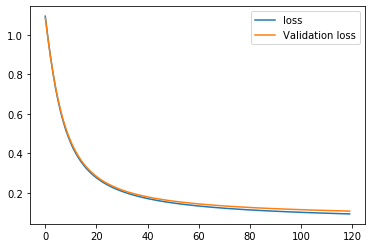

In [54]:
# plot, whats returned by model.fit
import matplotlib.pyplot as plt

plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='Validation loss')
plt.legend()

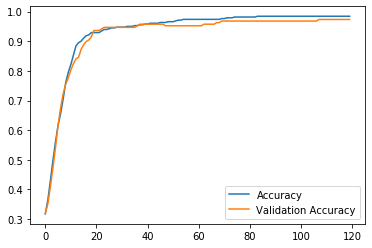

In [55]:
plt.plot(r.history['accuracy'],label='Accuracy')
plt.plot(r.history['val_accuracy'],label='Validation Accuracy')
plt.legend()